In [264]:
#!pip install tradingeconomics
#!pip install config

In [265]:
import configparser

# Create a ConfigParser object
config = configparser.ConfigParser()

# Read the config file
config.read('config.ini')


['config.ini']

In [266]:
#import API data from CSO with :
#reference: https://data.cso.ie/
# data also available in Data/BAA14.20230507T230558.csv
# BAA14
import requests
import pandas as pd
import io

url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA14%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)
data = response.json().get('result')
#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
df = pd.read_csv(io.StringIO(data))

print(df.head(5))   
print(df.info())
print(df.tail(5))







            Statistic Label  Year  \
0  Construction Enterprises  2019   
1  Construction Enterprises  2019   
2  Construction Enterprises  2019   
3  Construction Enterprises  2019   
4  Construction Enterprises  2019   

                                 Nace Rev 2 Activity    UNIT    VALUE  
0             Development of building projects (411)  Number   3846.0  
1  Construction of residential and non-residentia...  Number  12227.0  
2           Construction of roads and railways (421)  Number    777.0  
3             Construction of utility projects (422)  Number    304.0  
4  Construction of other civil engineering projec...  Number    540.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      880 non-null    object 
 1   Year                 880 non-null    int64  
 2   Nace Rev 2 Activity  880 non-null   

In [267]:
#print unique values in each column
print(df['Statistic Label'].unique())

['Construction Enterprises' 'Employees - Manual' 'Employees - Other'
 'Employees - Total'
 'Persons Engaged - Proprietors and Unpaid Family Workers'
 'Persons Engaged - Labour only subcontract basis'
 'Persons Engaged - Total' 'Wages and Salaries - Manual Employees'
 'Wages and Salaries - Other Employees'
 'Wages and Salaries - Manual and Other Employees'
 'Wages and Salaries - Labour only subcontractors'
 'Wages and Salaries - Total' 'Labour Costs - Other'
 'Labour Costs - Total' 'Turnover - Principal' 'Turnover - Subcontractor'
 'Turnover - Manufacturing' 'Turnover - Factored goods' 'Turnover - Other'
 'Turnover - Total' 'Payments to other subcontractors'
 'Turnover less payments to subcontractors' 'Assets made for own use'
 'Purchases - Materials and energy' 'Purchases - Industrial services'
 'Purchases - Factored goods' 'Purchases - Other goods/services'
 'Purchases - Total' 'Stocks at end of year - Work in progress'
 'Stocks at end of year - Unsold finished work'
 'Stocks at end o

In [268]:
print(df['Nace Rev 2 Activity'].unique())

['Development of building projects (411)'
 'Construction of residential and non-residential buildings (412)'
 'Construction of roads and railways (421)'
 'Construction of utility projects (422)'
 'Construction of other civil engineering projects (429)'
 'Demolition and site preparation (431)'
 'Electrical, plumbing and other construction installation activities (432)'
 'Building completion and finishing (433)'
 'Other specialised construction activities (439)'
 'Construction (41 to 43)']


In [269]:
#drop all rows where 'Nace Rev 2 Activity' not equal to 'Building completion and finishing (433)'
df = df[df['Nace Rev 2 Activity'] == 'Building completion and finishing (433)']

In [270]:
#drop column 'Construction of residential and non-residential buildings (412)'
df = df.drop(columns=['Nace Rev 2 Activity'])


In [271]:
print(df.columns.to_list())

['Statistic Label', 'Year', 'UNIT', 'VALUE']


In [272]:
#check for null values
print(df.isnull().sum())

Statistic Label     0
Year                0
UNIT                0
VALUE              62
dtype: int64


In [273]:
#drop rowns with null values
df = df.dropna()

In [274]:
df.to_csv('Data/BAA14.csv', index=False)

In [275]:
#print list of VALUE where Year = 2019
print(df.loc[df['Year'] == 2019, 'VALUE'].to_list())


[20096.0, 18308.0, 35597.0, 495965.0, 47975.0, 543939.0, 3078074.0, 10364.0, 2787627.0, 3039214.0, 1926951.0, 1112264.0, 1107713.0]


In [276]:
#normalize data in VALUE column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['VALUE'] = scaler.fit_transform(df[['VALUE']])
print(df.head(5))

              Statistic Label  Year    UNIT     VALUE
7    Construction Enterprises  2019  Number  0.004686
17   Construction Enterprises  2020  Number  0.005014
67          Employees - Total  2019  Number  0.004104
77          Employees - Total  2020  Number  0.003709
127   Persons Engaged - Total  2019  Number  0.009732


[0.004686275377753244, 0.004104315357234921, 0.009731556293891112, 0.15957259137553476, 0.01376036006009681, 0.17518721666879314, 1.0, 0.0015186943264756656, 0.9054650212083417, 0.9873518085026052, 0.6253313396537403, 0.3601662036157033, 0.3586849396037464]
[0.005013709259543754, 0.003708855947318948, 0.009612430249422597, 0.13617864480128733, 0.010527357328660294, 0.14828621236463244, 0.8848825794759495, 0.0, 0.7792096410074808, 0.8758794496506938, 0.5642232591323457, 0.30980159980419064, 0.305799159998646]
['Construction Enterprises', 'Employees - Total', 'Persons Engaged - Total', 'Wages and Salaries - Total', 'Labour Costs - Other', 'Labour Costs - Total', 'Turnover - Total', 'Purchases - Factored goods', 'Purchases - Total', 'Production value', 'Intermediate consumption', 'Gross value added at basic prices', 'Gross value added at factor cost']


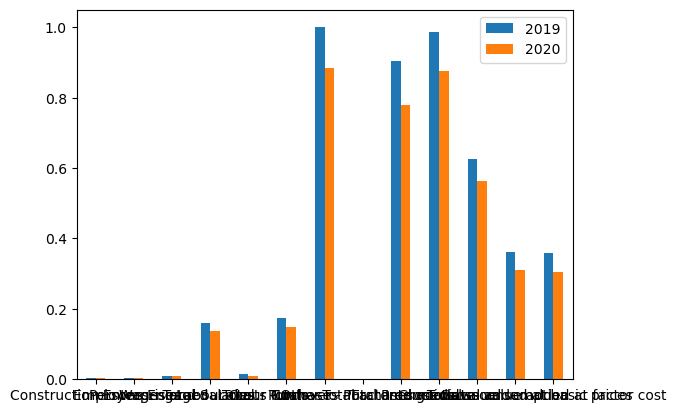

In [277]:
#plot a bar plot for each 'Statistic Label' 'VALUE' comparing 2019 and 2020
#reference: https://stackoverflow.com/questions/33458566/how-to-plot-a-bar-chart-using-matplotlib-using-a-dictionary
# list of values for each label for 2019 where UNIT = Number

nineteen = df.loc[df['Year'] == 2019, 'VALUE'].to_list()
twenty = df.loc[df['Year'] == 2020, 'VALUE'].to_list()
index_ = df.loc[df['Year'] == 2019, 'Statistic Label'].to_list()
# list of values for each label for 2020
print(nineteen)
print(twenty)
print(index_)
import matplotlib.pyplot as plt
import numpy as np
df = pd.DataFrame({'2019': nineteen, '2020': twenty}, index=index_)
ax = df.plot.bar(rot=0)
plt.show()

In [278]:
#BAA15 - Persons Engaged 


url = "https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%5D,%22dimension%22:%7B%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22CSV%22,%22version%22:%221.0%22%7D,%22matrix%22:%22BAA15%22%7D,%22version%22:%222.0%22%7D%7D"

response = requests.get(url)

data = response.json().get('result')

#ead the data into a dataframe where data in csv format
# Convert the CSV string to a Pandas DataFrame
personsEngaged_df = pd.read_csv(io.StringIO(data))
print(personsEngaged_df.head(5))
print(personsEngaged_df.info()) 

print(personsEngaged_df.tail(5))


            Statistic Label  Year Persons Engaged    UNIT    VALUE
0  Construction Enterprises  2019           0 - 9  Number  56935.0
1  Construction Enterprises  2019         10 - 49  Number   2007.0
2  Construction Enterprises  2019        50 - 249  Number    208.0
3  Construction Enterprises  2019    250 and over  Number     25.0
4  Construction Enterprises  2020           0 - 9  Number  60553.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  352 non-null    object 
 1   Year             352 non-null    int64  
 2   Persons Engaged  352 non-null    object 
 3   UNIT             352 non-null    object 
 4   VALUE            104 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.9+ KB
None
                      Statistic Label  Year Persons Engaged           UNIT  \
347  Gross value added at 

In [279]:
# reference https://ec.europa.eu/eurostat/databrowser/view/EI_ISBU_Q__custom_6200052/settings_1/table?lang=en
df = pd.read_csv('Data/ei_isbu_q__custom_6200052_linear.csv', header=0,  parse_dates=True, squeeze=True)

C:\Users\sclifford\AppData\Local\Temp\ipykernel_27580\3689701786.py:2: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.





In [280]:
df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,indic,nace_r2,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2010-Q1,90.4,NaN
1,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2010-Q2,88.9,NaN
2,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2010-Q3,87.0,NaN
3,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2010-Q4,79.2,NaN
4,ESTAT:EI_ISBU_Q(1.0),13/05/23 11:00:00,Q,I2015,NSA,IS-EPI,F,AL,2011-Q1,81.2,NaN


In [281]:
#drop column 'LAST UPDATE'
df = df.drop(columns=['LAST UPDATE'])
#drop column 'FREQ'
df = df.drop(columns=['freq'])
#drop column 'DATAFLOW'
df = df.drop(columns=['DATAFLOW'])
#drop column 's_adj'
df = df.drop(columns=['s_adj'])
#drop column 'unit'
df = df.drop(columns=['unit'])
#drop column 'nace_r2'
df = df.drop(columns=['nace_r2'])
#drop column 'OBS_FLAG'
df = df.drop(columns=['OBS_FLAG'])

df.head(5)



,indic,geo,TIME_PERIOD,OBS_VALUE
0,IS-EPI,AL,2010-Q1,90.4
1,IS-EPI,AL,2010-Q2,88.9
2,IS-EPI,AL,2010-Q3,87.0
3,IS-EPI,AL,2010-Q4,79.2
4,IS-EPI,AL,2011-Q1,81.2


In [282]:
#print unique values in 'indic' column
print(df['indic'].unique())

['IS-EPI' 'IS-HWI' 'IS-IP' 'IS-WSI']


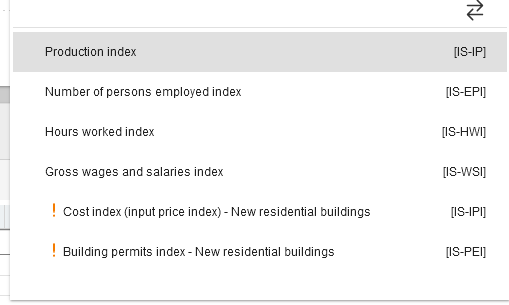

In [283]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
df['indic'] = encoder.fit_transform(df['indic'].values.reshape(-1,1))
print(df.head(5))

   indic geo TIME_PERIOD  OBS_VALUE
0    0.0  AL     2010-Q1       90.4
1    0.0  AL     2010-Q2       88.9
2    0.0  AL     2010-Q3       87.0
3    0.0  AL     2010-Q4       79.2
4    0.0  AL     2011-Q1       81.2


In [284]:
print(encoder.categories_)

[array(['IS-EPI', 'IS-HWI', 'IS-IP', 'IS-WSI'], dtype=object)]


In [285]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   indic        7252 non-null   float64
 1   geo          7252 non-null   object 
 2   TIME_PERIOD  7252 non-null   object 
 3   OBS_VALUE    7248 non-null   float64
dtypes: float64(2), object(2)
memory usage: 226.8+ KB
None


In [286]:
#check for null values
print(df.isnull().sum())

indic          0
geo            0
TIME_PERIOD    0
OBS_VALUE      4
dtype: int64


In [287]:
#drop rowns with null values
df = df.dropna()

In [288]:
#for values in 'TIME_PERIOD' column replace '-Q' with '.'
df['TIME_PERIOD'] = df['TIME_PERIOD'].str.replace('-Q', '.')
df.head(5)

,indic,geo,TIME_PERIOD,OBS_VALUE
0,0.0,AL,2010.1,90.4
1,0.0,AL,2010.2,88.9
2,0.0,AL,2010.3,87.0
3,0.0,AL,2010.4,79.2
4,0.0,AL,2011.1,81.2


In [289]:
#convert 'TIME_PERIOD' column to int
df['TIME_PERIOD'] = df['TIME_PERIOD'].astype(float)
df.head(5)

,indic,geo,TIME_PERIOD,OBS_VALUE
0,0.0,AL,2010.1,90.4
1,0.0,AL,2010.2,88.9
2,0.0,AL,2010.3,87.0
3,0.0,AL,2010.4,79.2
4,0.0,AL,2011.1,81.2


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7248 entries, 0 to 7251
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   indic        7248 non-null   float64
 1   geo          7248 non-null   object 
 2   TIME_PERIOD  7248 non-null   float64
 3   OBS_VALUE    7248 non-null   float64
dtypes: float64(3), object(1)
memory usage: 283.1+ KB


In [291]:
#pip install pycountry

In [292]:
import pycountry

# Define a function to get the country name from an ISO-3166-1 alpha-2 code
def get_country_name(iso_2):
    try:
        return pycountry.countries.get(alpha_2=iso_2).name
    except:
        return None

# Add a new column to the dataframe with the country names
df['country_name'] = df['geo'].apply(get_country_name)

df.head(5)


,indic,geo,TIME_PERIOD,OBS_VALUE,country_name
0,0.0,AL,2010.1,90.4,Albania
1,0.0,AL,2010.2,88.9,Albania
2,0.0,AL,2010.3,87.0,Albania
3,0.0,AL,2010.4,79.2,Albania
4,0.0,AL,2011.1,81.2,Albania


In [293]:
#df_test = all values in df where indic = 0.0
df_test = df.loc[df['indic'] == 0.0]

In [294]:
df_test.head(5)

,indic,geo,TIME_PERIOD,OBS_VALUE,country_name
0,0.0,AL,2010.1,90.4,Albania
1,0.0,AL,2010.2,88.9,Albania
2,0.0,AL,2010.3,87.0,Albania
3,0.0,AL,2010.4,79.2,Albania
4,0.0,AL,2011.1,81.2,Albania


In [295]:
#print unique values in 'geo' column
print(df_test['geo'].unique())

['AL' 'AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR'
 'HR' 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL'
 'PT' 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK']


In [298]:
import plotly.express as px

fig = px.choropleth(df_test, locations="country_name", locationmode="country names", color="OBS_VALUE")
fig.show()


In [302]:
import plotly.express as px
fig = px.scatter_geo(df_test, 
                    locations="country_name",
                    locationmode="country names",
                    scope='europe',
 # name of column indicating country-codes
                    size="OBS_VALUE", 
 # name of column by which to size the bubble
                    hover_name="country_name", 
# name of column to be displayed while hovering over the map
                    size_max=20, # parameter to scale all bubble size
                    animation_frame="TIME_PERIOD",
                    )
                    
fig.update_layout(
    # add a title text for the plot
    title_text = 'Internet users across the world',
    # set projection style for the plot
    geo = dict(projection={'type':'equirectangular'}) # by default, projection type is set to 'equirectangular'
)
fig.show()


#map column 'indic' values to INT values
#reference: https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers
df['indic'] = df['indic'].map({'IS-IP': 1, 'IS-EPI':2, 'IS-HWI':3, 'IS-WSI':4, 'IS-IPI':5, 'IS-PEI':6})
df.head(5)